In [2]:
import ee 
import geemap
import geemap.chart as chart
import os
import folium
import xarray_leaflet
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
work_dir = os.path.expanduser('../Data/')
data_QM_csv = os.path.join(work_dir, 'TM_summer_QM.csv')

In [4]:
data_QM_df= pd.read_csv(data_QM_csv, sep=';')

In [5]:
data_QM_df.describe()

,C_ID,B1,B2,B3,B4,B5,B6,B7,EVI,NDBI,...,NDSI,NDVI,NDWI,SAVI,brightness,fifth,fourth,greenness,sixth,wetness
count,25398.000000,2.539800e+04,2.539800e+04,2.539800e+04,2.539800e+04,2.539800e+04,25398.000000,25398.000000,2.539800e+04,25398.000000,...,25398.000000,25398.000000,25398.000000,2.539800e+04,2.539800e+04,2.539800e+04,25398.000000,2.539800e+04,2.539800e+04,2.539800e+04
mean,17.135129,1.284531e+04,1.563889e+04,1.474138e+04,1.918324e+04,1.477284e+04,27.279328,925.830445,2.507203e+14,0.625717,...,-1.350483,-1.001065,0.806927,8.261910e+07,3.696555e+14,-4.544833e+08,-0.080431,-5.818860e+08,-2.842744e+07,7.377760e+12
std,15.701254,3.809699e+05,4.253536e+05,4.132846e+05,4.787432e+05,4.158603e+05,460.376837,2306.142827,4.262508e+15,197.072734,...,124.851917,241.664005,101.741826,6.861713e+10,2.125141e+15,9.293234e+10,0.060272,6.774576e+10,3.203420e+09,2.926752e+14
min,1.000000,8.567417e-02,6.435764e-02,3.599651e-02,1.895644e-02,1.747665e-03,-6830.000000,-8830.000000,-7.107745e+16,-8440.000000,...,-8520.000000,-11300.000000,-3950.000000,-3.540000e+12,4.646128e-02,-4.060000e+12,-0.555704,-4.400000e+12,-3.610000e+11,-4.430000e+12
25%,5.000000,1.103374e-01,8.534696e-02,6.358406e-02,3.683014e-02,1.579460e-02,0.001891,0.021656,-3.555014e-01,-0.772702,...,-0.232646,-0.598372,-0.552801,-1.190492e-01,1.222421e-01,-3.003202e-02,-0.079854,-1.023404e-01,-6.456603e-02,3.074901e-02
50%,9.000000,1.412835e-01,1.232640e-01,1.014405e-01,6.362331e-02,1.610242e-01,0.051792,0.062477,6.550696e-02,-0.598878,...,0.349446,-0.001746,0.011167,-1.286849e-03,2.278017e-01,5.151238e-03,-0.062529,-4.615741e-02,-3.727913e-02,5.717862e-02
75%,31.000000,1.726962e-01,1.700213e-01,1.572161e-01,1.255348e-01,2.883047e-01,0.130126,0.377068,5.687728e-01,-0.355998,...,0.961682,0.677103,0.755526,3.403709e-01,3.655410e-01,3.370881e-02,-0.052063,9.266327e-02,-1.892059e-02,8.629109e-02
max,60.000000,1.462188e+07,1.588496e+07,1.587377e+07,1.659528e+07,1.617296e+07,9730.000000,9760.000000,7.632614e+16,7750.000000,...,4000.000000,9420.000000,8930.000000,3.490000e+12,2.724305e+16,4.090000e+12,-0.015330,3.080000e+12,-1.274769e-03,1.476473e+16


In [6]:
corr_bands = data_QM_df.corr().round(2)

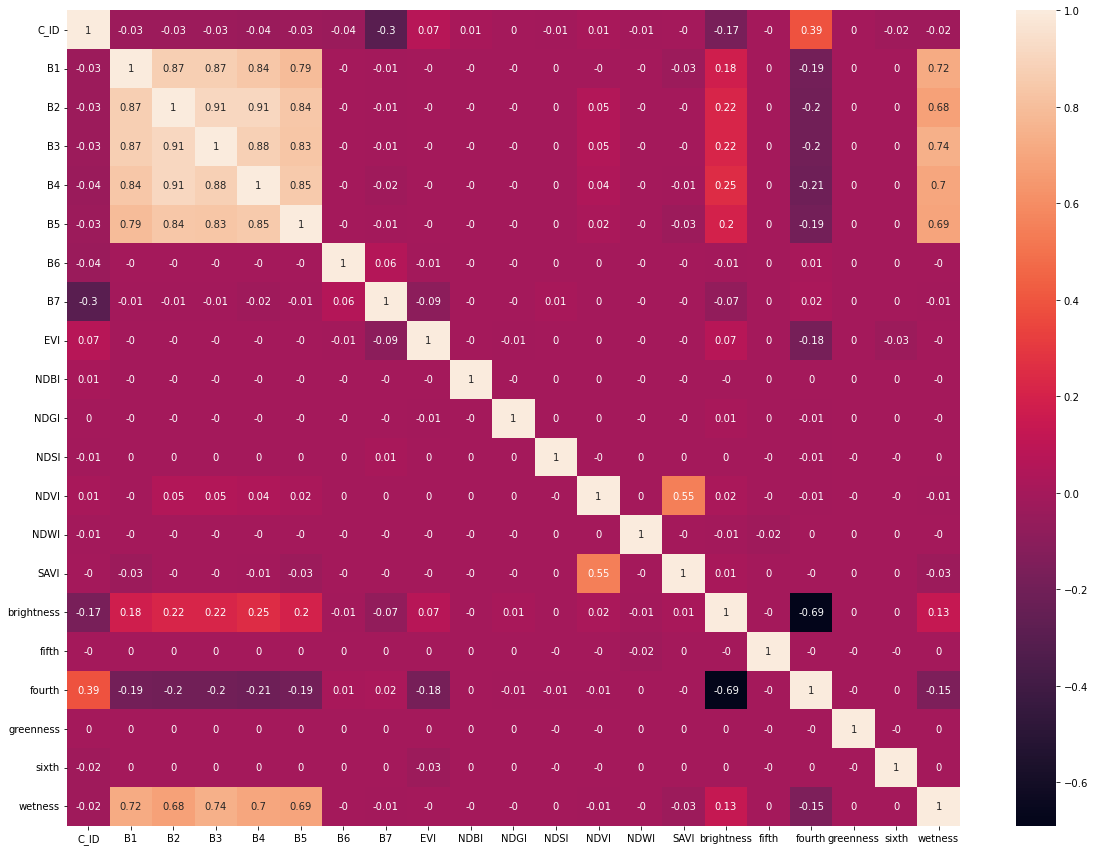

In [7]:
plt.figure(figsize=(20,15))
plot= sns.heatmap(corr_bands, annot=True)

In [8]:
data_med_csv = os.path.join(work_dir, 'TM_summer_Med.csv')
data_med_df= pd.read_csv(data_med_csv, sep=';')

In [9]:
data_med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25398 entries, 0 to 25397
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  25398 non-null  object 
 1   B1            25398 non-null  float64
 2   B2            25398 non-null  float64
 3   B3            25398 non-null  float64
 4   B4            25398 non-null  float64
 5   B5            25398 non-null  float64
 6   B6            25398 non-null  float64
 7   B7            25398 non-null  float64
 8   C_ID          25398 non-null  int64  
 9   EVI           25398 non-null  float64
 10  NDBI          25398 non-null  float64
 11  NDGI          25398 non-null  float64
 12  NDSI          25398 non-null  float64
 13  NDVI          25398 non-null  float64
 14  NDWI          25398 non-null  float64
 15  SAVI          25398 non-null  float64
 16  brightness    25398 non-null  float64
 17  fifth         25398 non-null  float64
 18  fourth        25398 non-nu

In [10]:
corr_bands_med = data_med_df.corr().round(2)

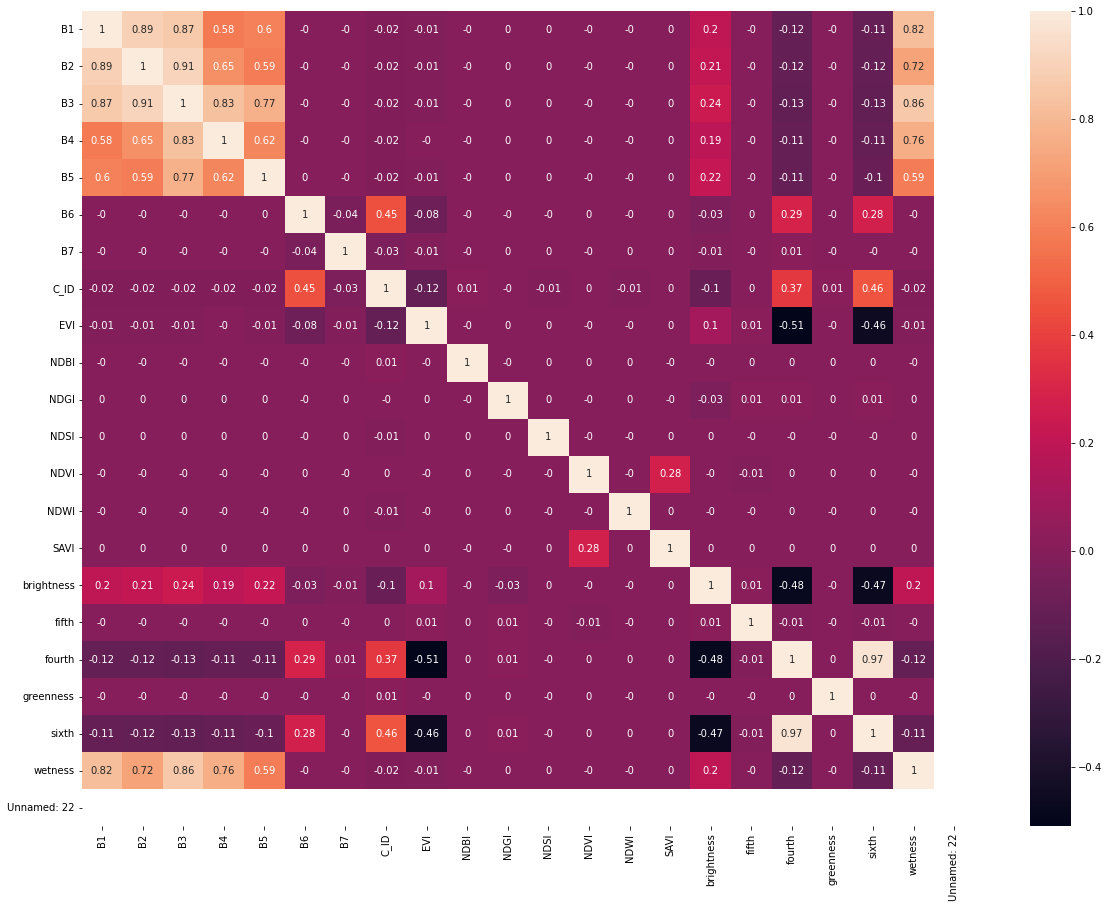

In [11]:
plt.figure(figsize=(20,15))
plot= sns.heatmap(corr_bands_med, annot=True)

In [14]:
turbera = data_med_df.loc[data_med_df.C_ID == 16]
turbera

,system:index,B1,B2,B3,B4,B5,B6,B7,C_ID,EVI,...,NDVI,NDWI,SAVI,brightness,fifth,fourth,greenness,sixth,wetness,Unnamed: 22
17471,673_0,0.119628,0.095531,0.077538,0.064687,0.341107,0.193894,0.085935,16,0.652475,...,0.674872,-0.616174,0.445681,0.386726,2.811121e-02,-0.048271,0.166172,-0.016253,-0.009987,NaN
17472,673_1,0.120481,0.096698,0.078809,0.066888,0.337093,0.194688,0.087943,16,0.646472,...,0.661650,-0.612273,0.444581,0.387006,2.856401e-02,-0.048322,0.161139,-0.016568,-0.011686,NaN
17473,673_2,0.120795,0.095964,0.079017,0.066888,0.337539,0.195632,0.087943,16,0.661415,...,0.658480,-0.612273,0.451430,0.387572,2.848931e-02,-0.047536,0.161696,-0.016834,-0.012275,NaN
17474,673_3,0.121708,0.096832,0.080446,0.067672,0.353724,0.191822,0.085788,16,0.686099,...,0.654110,-0.609096,0.445290,0.395327,3.128289e-02,-0.048892,0.172519,-0.016732,-0.002397,NaN
17475,673_4,0.121708,0.096832,0.080446,0.067672,0.353724,0.191822,0.085788,16,0.686099,...,0.654110,-0.609096,0.445290,0.395327,3.128289e-02,-0.048892,0.172519,-0.016732,-0.002397,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24464,1161_31,0.125624,0.098908,0.070174,0.055152,0.112736,0.062323,0.039024,16,0.201056,...,0.330828,-0.241057,0.120965,0.177700,2.511631e-03,-0.056102,0.004140,-0.024077,0.023160,NaN
24465,1161_32,0.127319,0.102011,0.071053,0.055304,0.114964,0.067335,0.038569,16,0.204273,...,0.291179,-0.231627,0.129510,0.182665,-5.796741e+11,-0.057511,0.004983,-0.024486,0.021251,NaN
24466,1161_33,0.127751,0.100675,0.070677,0.055628,0.114320,0.064236,0.037935,16,0.188214,...,0.278360,-0.230059,0.110909,0.180254,5.894625e+10,-0.056711,0.004703,-0.024130,0.023357,NaN
24467,1161_34,0.128618,0.101123,0.069840,0.055841,0.114849,0.062873,0.036830,16,0.179579,...,0.313237,-0.227613,0.107698,0.179655,2.151016e+11,-0.057056,0.005126,-0.023201,0.024983,NaN


In [15]:
corr_turbera = turbera.corr().round(2)

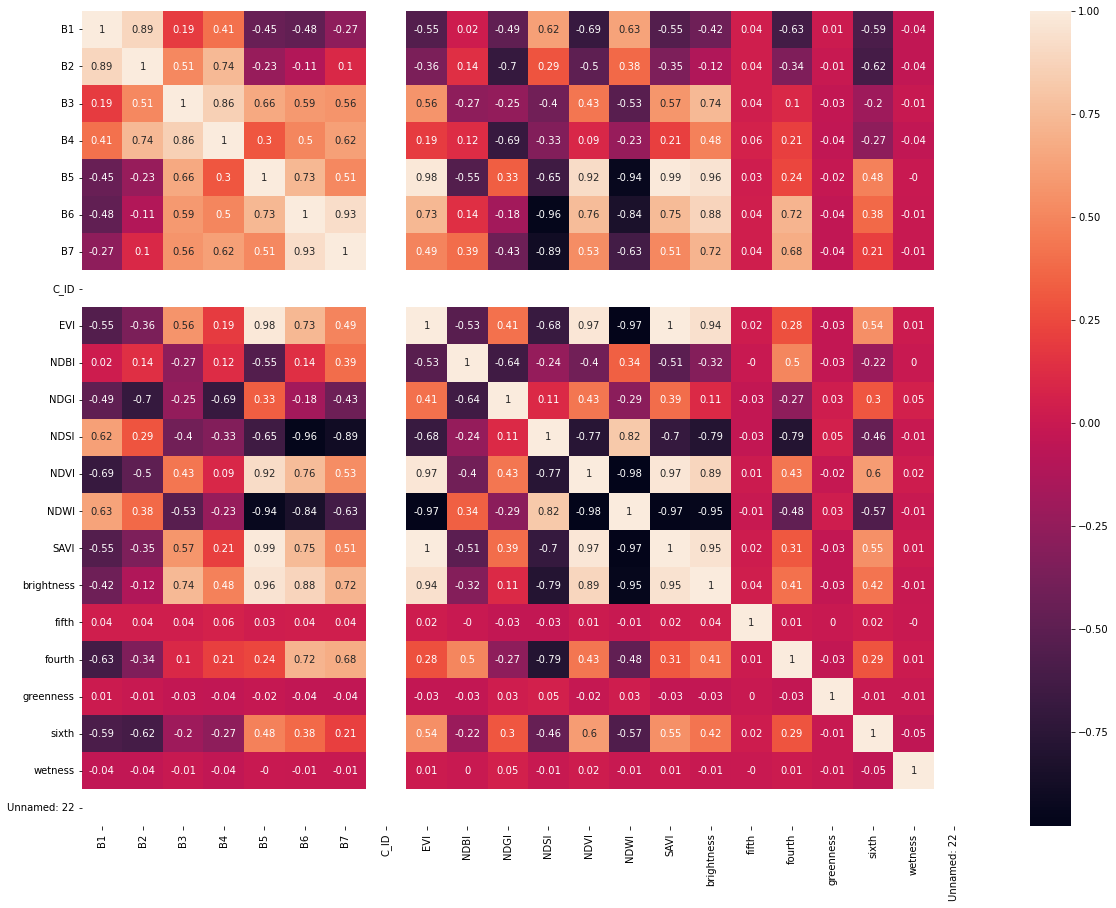

In [16]:
plt.figure(figsize=(20,15))
plot= sns.heatmap(corr_turbera, annot=True)

In [20]:
data_txt_csv = os.path.join(work_dir, 'txt.csv')
data_txt_df= pd.read_csv(data_txt_csv, sep=';')

/home/paysen/anaconda3/envs/gee/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (51,69,87,105) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_txt_df.info()

In [ ]:
corr_bands_qm_txt = data_txt_df.corr().round(2)

In [ ]:
plt.figure(figsize=(20,15))
plot= sns.heatmap(corr_bands_qm_txt, annot=True)